In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs

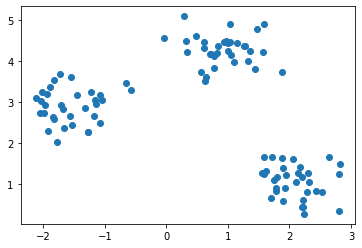

In [16]:
X, y= make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [2]:
from sklearn.cluster import KMeans

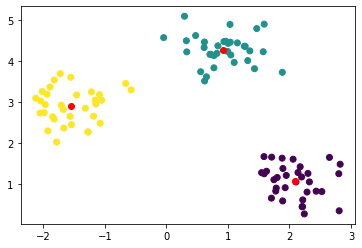

In [20]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

In [21]:
inertia = []
k_range = range(1, 20)
for k in k_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'nombre de model(Inertia)')

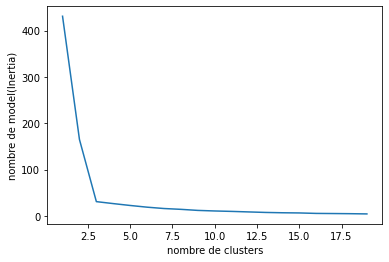

In [23]:
plt.plot(k_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('nombre de model(Inertia)')

In [24]:
#Detection anomalie avec Isolation Forest
from sklearn.ensemble import IsolationForest

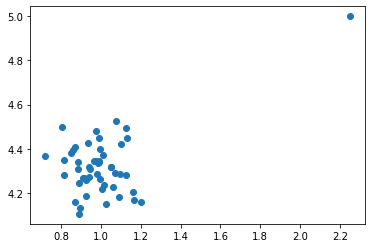

In [25]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [26]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

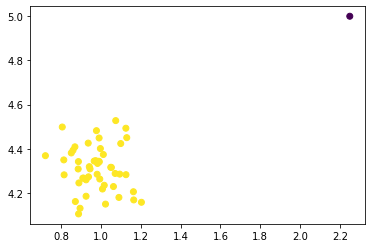

In [27]:
plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

In [29]:
#Application decontamination digits

from sklearn.datasets import load_digits

In [30]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


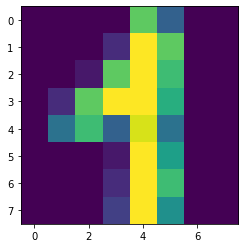

In [36]:
plt.imshow(images[42])

In [38]:
model = IsolationForest(random_state=0, contamination = 0.02)

In [39]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [41]:
outliers = model.predict(X) == -1

In [42]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

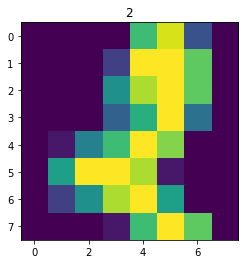

In [53]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

In [54]:
from sklearn.decomposition import PCA
model = PCA(n_components=10)

model.fit_transform(X)

array([[ -1.25945813,  21.27495009,  -9.4628009 , ...,   2.56989518,
         -0.57587353,  -3.61658476],
       [  7.95757771, -20.76853354,   4.43957433, ...,  -4.59922553,
          3.58356797,   1.0616112 ],
       [  6.99192482,  -9.95614672,   2.95846988, ..., -16.40525595,
          0.7356749 ,  -4.22710129],
       ...,
       [ 10.80132965,  -6.96029138,   5.59973265, ...,  -7.42055427,
         -3.96417012,  13.07446147],
       [ -4.87199273,  12.42405406, -10.16985596, ...,  -4.27317925,
          4.01432388,  13.1947628 ],
       [ -0.34436586,   6.36539919,  10.77358385, ...,   0.65956502,
         -4.10496994,  12.57535905]])

In [56]:
X.shape

(1797, 64)

In [59]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

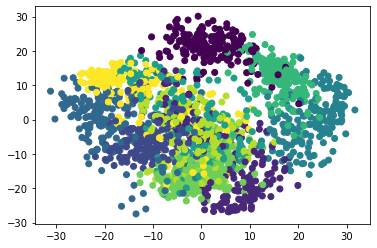

In [76]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

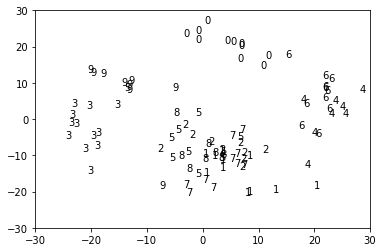

In [77]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

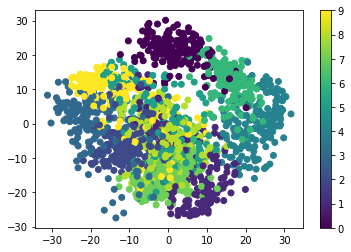

In [64]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.colorbar()

In [67]:
model.components_.shape

(2, 64)

In [68]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

In [74]:
np.argmax(np.cumsum(model.explained_variance_ratio_))>40

True